In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [384]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,classification_report,auc,roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import chi2,f_classif,SelectKBest,VarianceThreshold
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,train_test_split

In [385]:
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline(connected=True)

In [386]:
from plotly.offline import iplot

In [387]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

In [388]:
pd.pandas.set_option('display.max_columns',None)

In [389]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [390]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [391]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [392]:
len(data.columns)

21

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [394]:
round(data.describe(),1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.3,2.6,962.5,0.2,0.1,93.6,-40.5,3.6,5167.0
std,10.4,259.3,2.8,186.9,0.5,1.6,0.6,4.6,1.7,72.3
min,17.0,0.0,1.0,0.0,0.0,-3.4,92.2,-50.8,0.6,4963.6
25%,32.0,102.0,1.0,999.0,0.0,-1.8,93.1,-42.7,1.3,5099.1
50%,38.0,180.0,2.0,999.0,0.0,1.1,93.7,-41.8,4.9,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.4,94.0,-36.4,5.0,5228.1
max,98.0,4918.0,56.0,999.0,7.0,1.4,94.8,-26.9,5.0,5228.1


In [395]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [396]:
data.duplicated().sum()

12

In [397]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## EDA

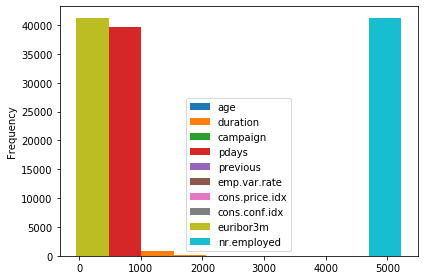

In [398]:
fig,ax = plt.subplots()
data.plot(kind='hist',ax=ax)
plt.tight_layout()
plt.show()

## response of the customer.

In [399]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

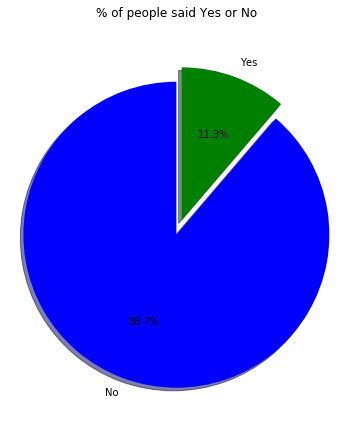

In [400]:
plt.figure(figsize=(5,6))
plt.pie(data['y'].value_counts(),explode=[0,0.1],labels=['No','Yes'],autopct='%1.1f%%',shadow=True,startangle=90,colors=['blue','green'])
plt.tight_layout()
plt.tick_params(labelsize=50)
plt.title('% of people said Yes or No')
plt.axis('equal')
plt.show()

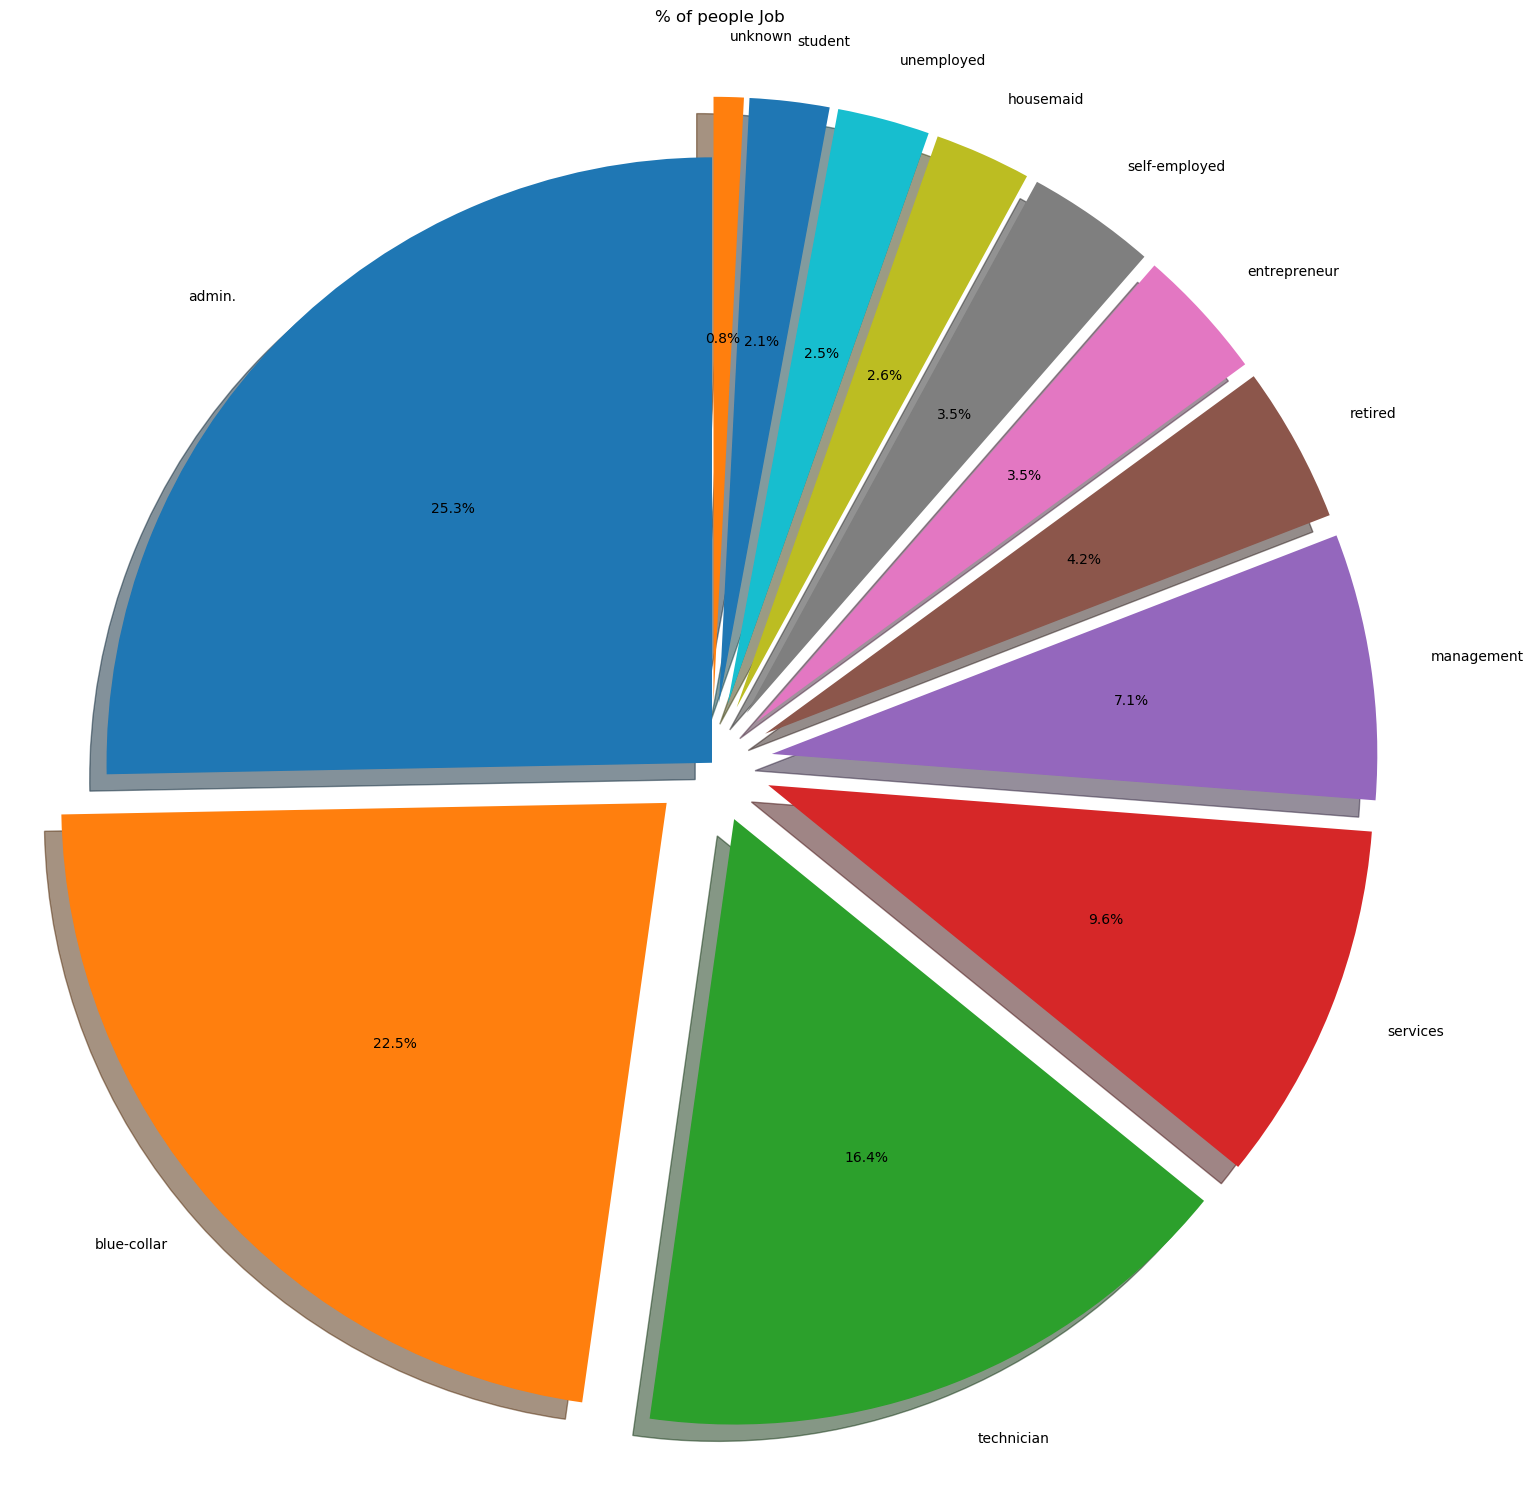

In [401]:
plt.figure(figsize=(15,15),dpi=100)
plt.pie(data['job'].value_counts(),explode=[0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],labels=['admin.','blue-collar','technician','services','management','retired','entrepreneur','self-employed','housemaid','unemployed','student','unknown'],autopct='%1.1f%%',shadow=True,startangle=90)
plt.tight_layout()
plt.tick_params(labelsize=50)
plt.title('% of people Job')
plt.axis('equal')
plt.show()

In [402]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

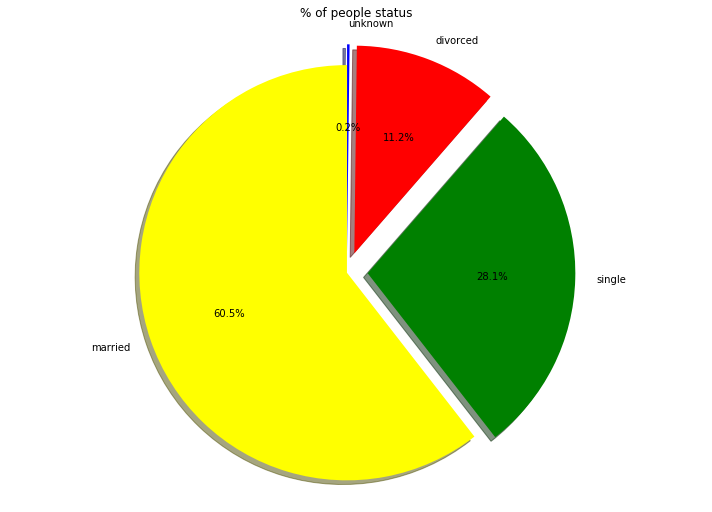

In [403]:
plt.figure(figsize=(10,7))
plt.pie(data['marital'].value_counts(),explode=[0,0.1,0.1,0.1],labels=['married','single','divorced','unknown'],autopct='%1.1f%%',shadow=True,startangle=90,colors=['yellow','green','red','blue'])
plt.tight_layout()
plt.tick_params(labelsize=50)
plt.title('% of people status')
plt.axis('equal')
plt.show()

In [404]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

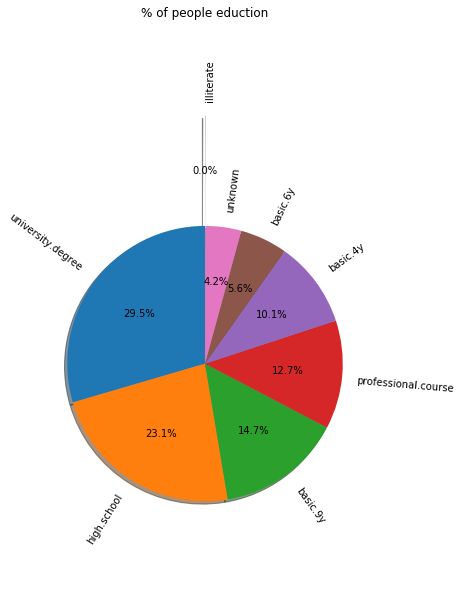

In [405]:
plt.figure(figsize=(6,9))
plt.pie(data['education'].value_counts(),explode=[0,0,0,0,0,0,0,0.8],labels=['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate'],autopct='%1.1f%%',shadow=True,startangle=90,rotatelabels=90)
plt.tight_layout()
plt.tick_params(labelsize=50)
plt.title('% of people eduction')
plt.axis('equal')
plt.show()

In [406]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

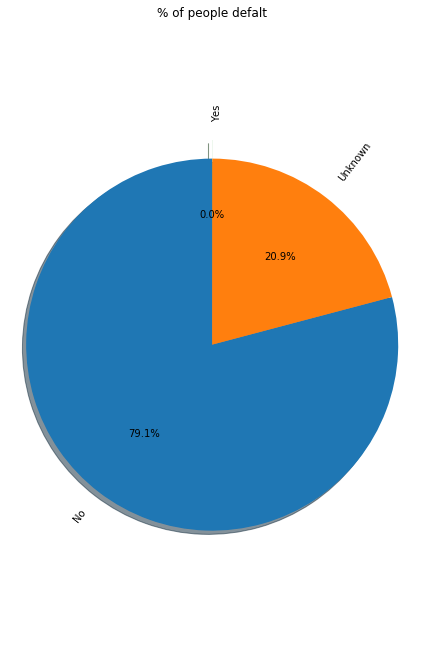

In [407]:
plt.figure(figsize=(6,9))
plt.pie(data['default'].value_counts(),explode=[0,0,0.1],labels=['No','Unknown','Yes'],autopct='%1.1f%%',shadow=True,startangle=90,rotatelabels=90)
plt.tight_layout()
plt.tick_params(labelsize=50)
plt.title('% of people defalt')
plt.axis('equal')
plt.show()

In [408]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

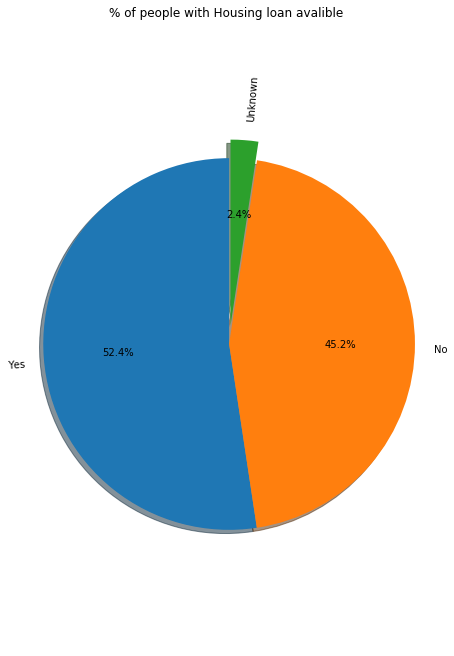

In [409]:
plt.figure(figsize=(6,9))
plt.pie(data['housing'].value_counts(),explode=[0,0,0.1],labels=['Yes','No','Unknown'],autopct='%1.1f%%',shadow=True,startangle=90,rotatelabels=90)
plt.tight_layout()
plt.tick_params(labelsize=50)
plt.title('% of people with Housing loan avalible ')
plt.axis('equal')
plt.show()

In [410]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

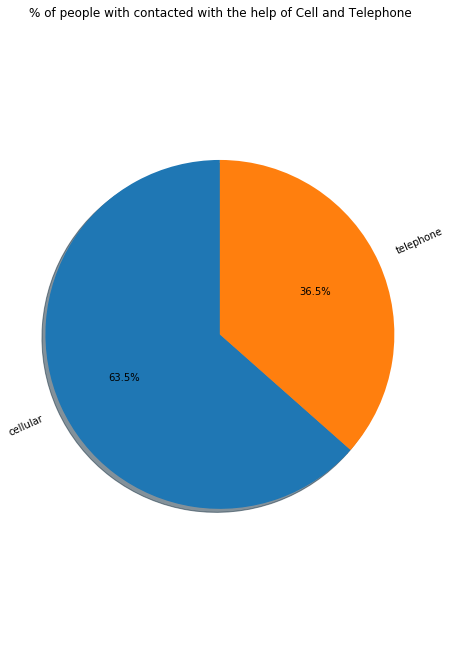

In [411]:
plt.figure(figsize=(6,9))
plt.pie(data['contact'].value_counts(),explode=[0,0],labels=['cellular','telephone'],autopct='%1.1f%%',shadow=True,startangle=90,rotatelabels=90)
plt.tight_layout()
plt.tick_params(labelsize=50)
plt.title('% of people with contacted with the help of Cell and Telephone')
plt.axis('equal')
plt.show()

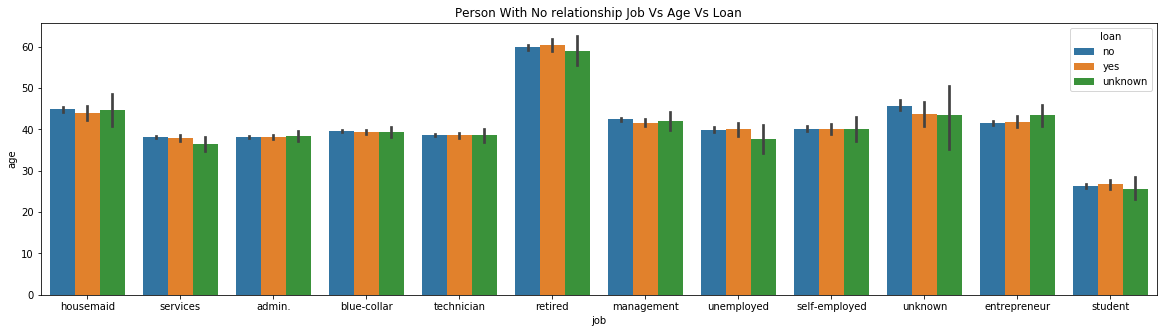

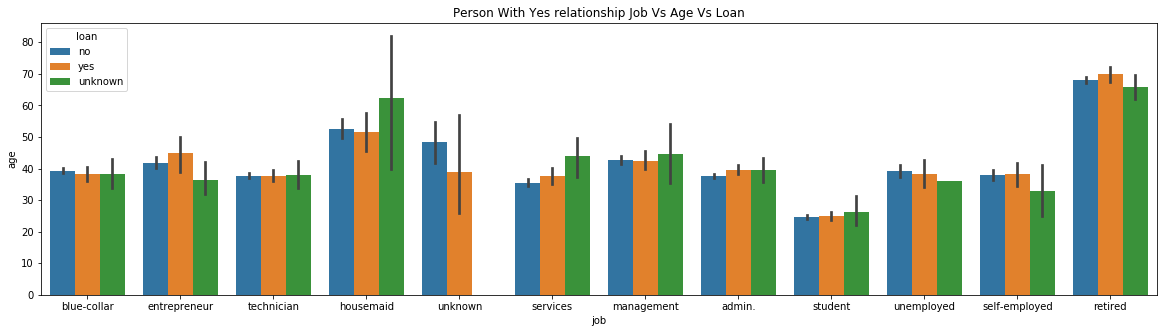

In [412]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='no']['job'],data['age'],hue=data['loan'],ax=ax)
plt.title('Person With No relationship Job Vs Age Vs Loan')
plt.show()
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='yes']['job'],data['age'],hue=data['loan'],ax=ax)
plt.title('Person With Yes relationship Job Vs Age Vs Loan')
plt.show()

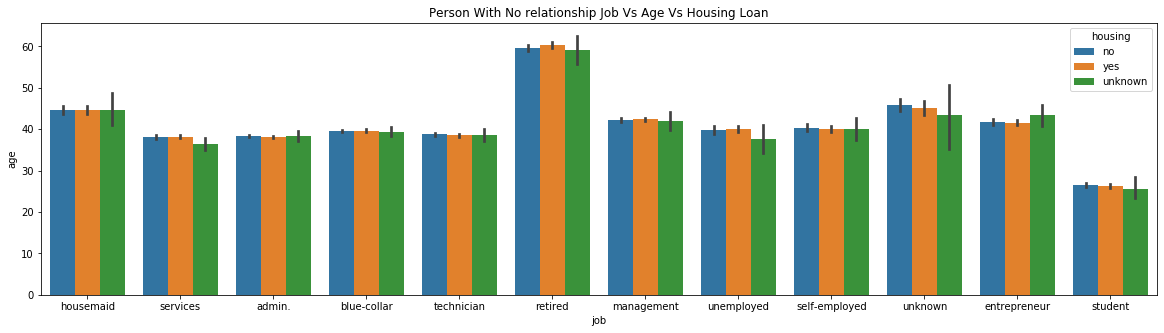

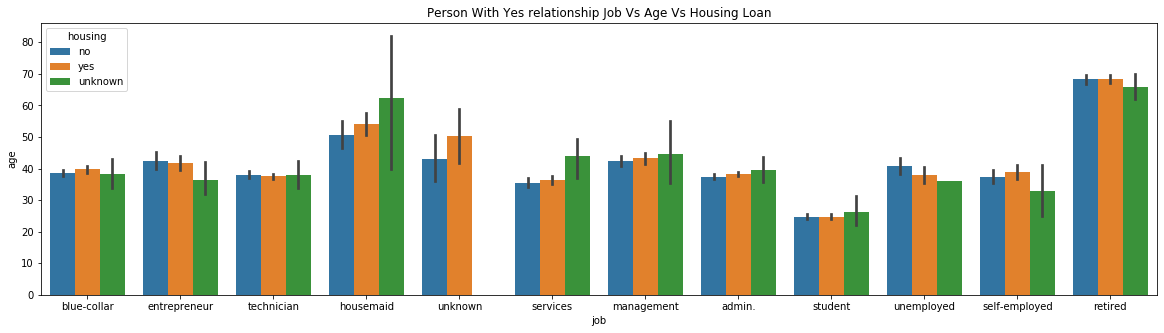

In [413]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='no']['job'],data['age'],hue=data['housing'],ax=ax)
plt.title('Person With No relationship Job Vs Age Vs Housing Loan')
plt.show()
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='yes']['job'],data['age'],hue=data['housing'],ax=ax)
plt.title('Person With Yes relationship Job Vs Age Vs Housing Loan')
plt.show()

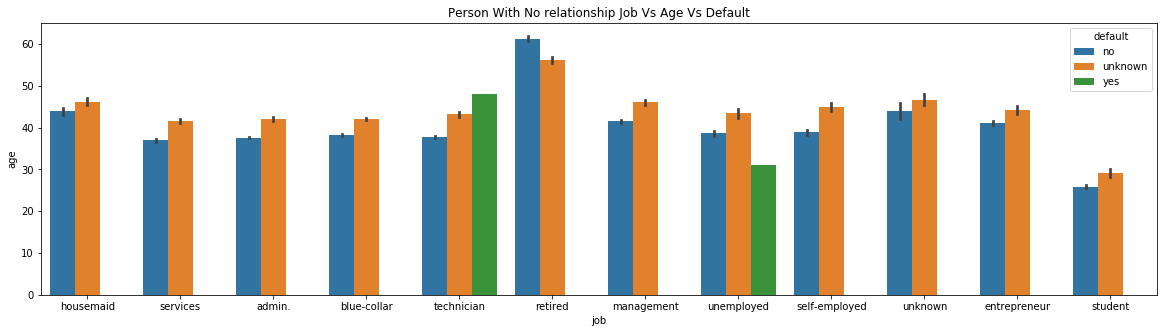

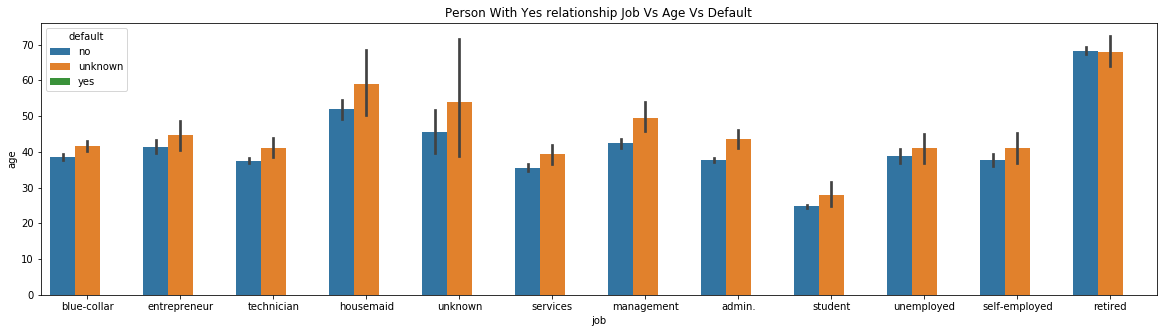

In [414]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='no']['job'],data['age'],hue=data['default'],ax=ax)
plt.title('Person With No relationship Job Vs Age Vs Default')
plt.show()
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='yes']['job'],data['age'],hue=data['default'],ax=ax)
plt.title('Person With Yes relationship Job Vs Age Vs Default')
plt.show()

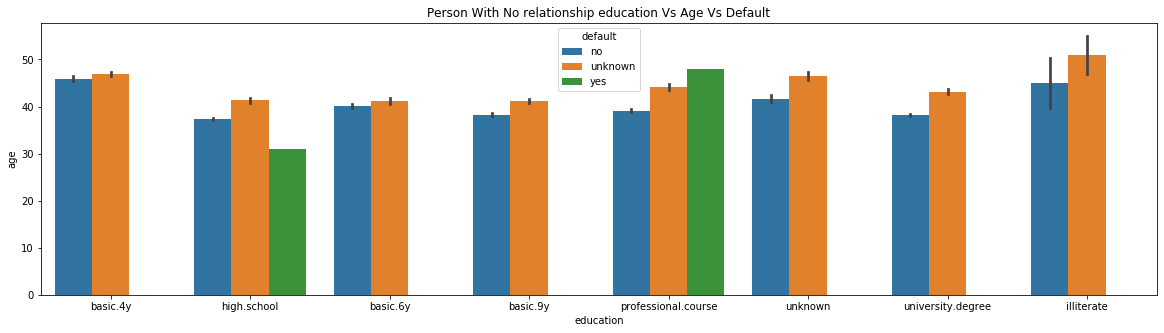

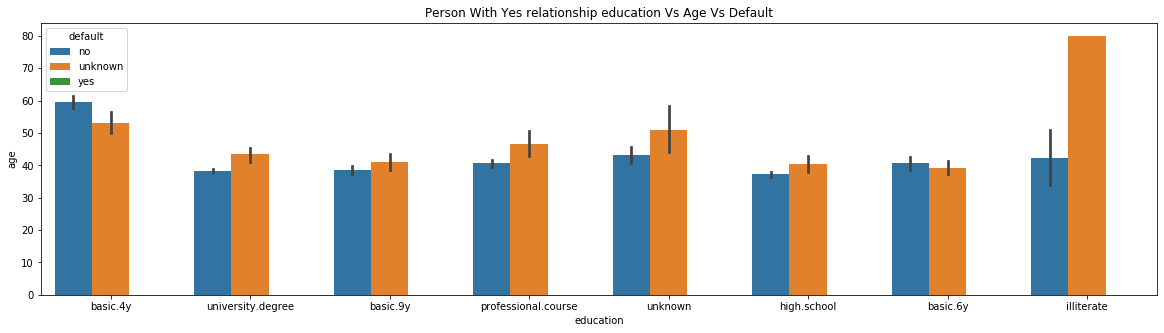

In [415]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='no']['education'],data['age'],hue=data['default'],ax=ax)
plt.title('Person With No relationship education Vs Age Vs Default')
plt.show()
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='yes']['education'],data['age'],hue=data['default'],ax=ax)
plt.title('Person With Yes relationship education Vs Age Vs Default')
plt.show()

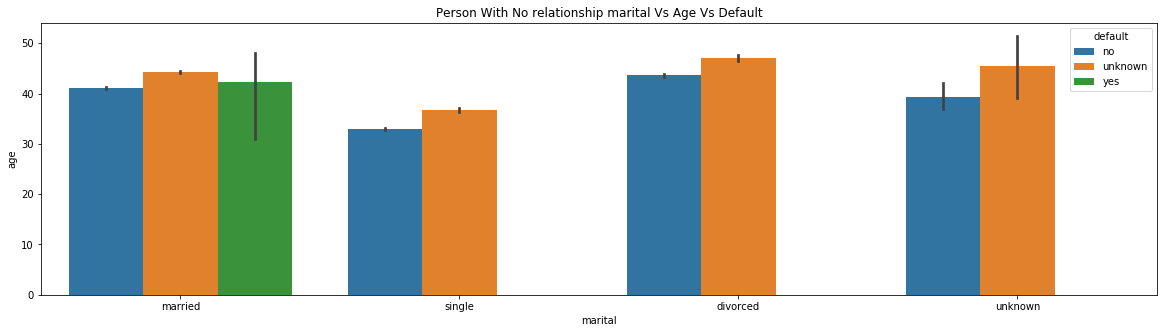

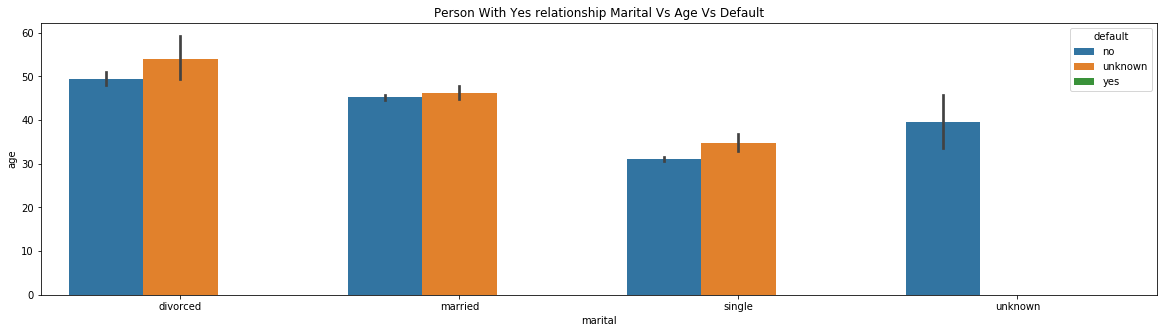

In [416]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='no']['marital'],data['age'],hue=data['default'],ax=ax)
plt.title('Person With No relationship marital Vs Age Vs Default')
plt.show()
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data[data['y']=='yes']['marital'],data['age'],hue=data['default'],ax=ax)
plt.title('Person With Yes relationship Marital Vs Age Vs Default')
plt.show()

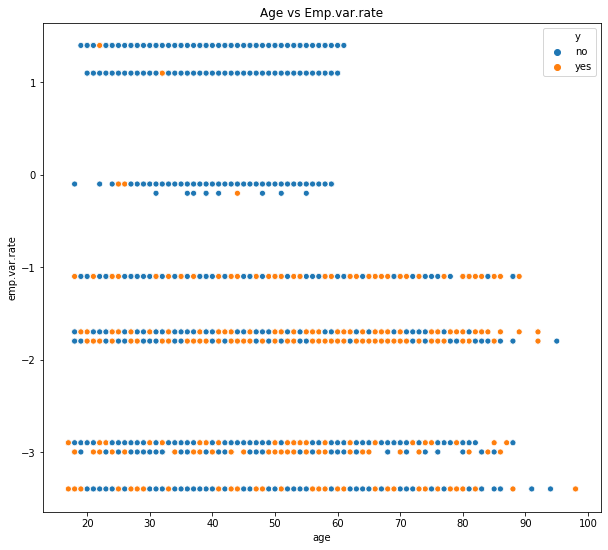

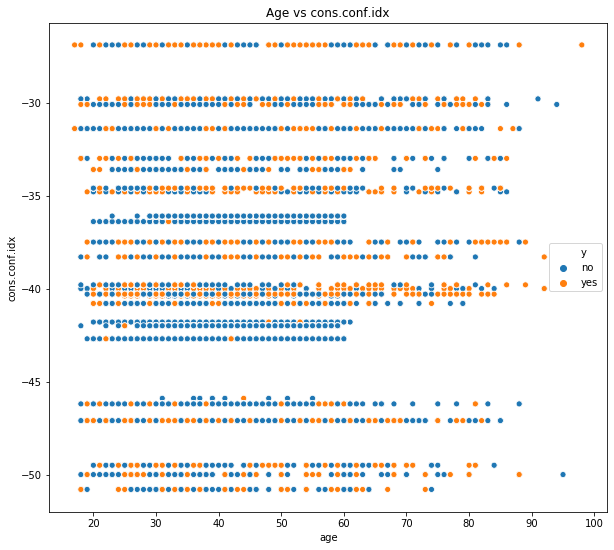

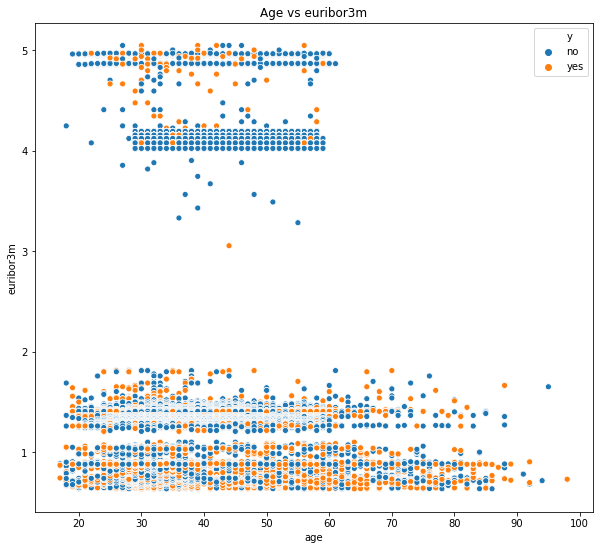

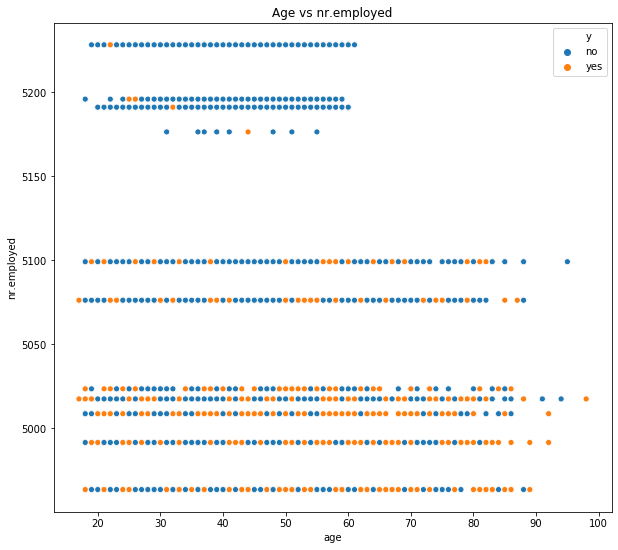

In [417]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['age'],data['emp.var.rate'],hue=data['y'])
plt.title('Age vs Emp.var.rate')
plt.show()
plt.figure(figsize=(10,9))
sns.scatterplot(data['age'],data['cons.conf.idx'],hue=data['y'])
plt.title('Age vs cons.conf.idx')
plt.show()
plt.figure(figsize=(10,9))
sns.scatterplot(data['age'],data['euribor3m'],hue=data['y'])
plt.title('Age vs euribor3m')
plt.show()
plt.figure(figsize=(10,9))
sns.scatterplot(data['age'],data['nr.employed'],hue=data['y'])
plt.title('Age vs nr.employed')
plt.show()

## Data PreProcessing and Feature Engineering.

In [418]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [419]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [420]:
m = {'unemployed':0,'unknown':1,'unemployed':2,'housemaid':3,'student':4,'blue-collar':5,'retired':6,'self-employed':7,'services':8,'management':9,'technician':10,'admin.':11,'entrepreneur':12}

In [421]:
data['job'] = data['job'].map(m)

In [422]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [423]:
mi = {'married':3,'single':4,'divorced':0,'unknown':1}

In [424]:
data['marital']=data['marital'].map(mi)

In [425]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [426]:
c = {'no':0,'yes':1}
data['y'] = data['y'].map(c)

In [427]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [428]:
mw = {'university.degree':0.137,'high.school':0.108,'basic.9y':0.078,'professional.course':0.113,'basic.4y':0.102,'basic.6y':0.082,'unknown':0.145,'illiterate':0.222}

In [429]:
round(data[data['education']=='university.degree']['y'].mean(),3)

0.137

In [430]:
round(data[data['education']=='high.school']['y'].mean(),3)

0.108

In [431]:
round(data[data['education']=='basic.9y']['y'].mean(),3)

0.078

In [432]:
round(data[data['education']=='professional.course']['y'].mean(),3)

0.113

In [433]:
round(data[data['education']=='basic.4y']['y'].mean(),3)

0.102

In [434]:
round(data[data['education']=='basic.6y']['y'].mean(),3)

0.082

In [435]:
round(data[data['education']=='unknown']['y'].mean(),3)

0.145

In [436]:
round(data[data['education']=='illiterate']['y'].mean(),3)

0.222

In [437]:
data['education'] = data['education'].map(mw)

In [438]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [439]:
v = {'no':0,'unknown':1,'yes':2}

In [440]:
data['default']=data['default'].map(v)

In [441]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [442]:
h = {'yes':2,'no':1,'unknown':0}
data['housing'] = data['housing'].map(h)

In [443]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [444]:
j = {'yes':2,'no':1,'unknown':0}
data['loan'] = data['loan'].map(j)

In [445]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [446]:
round(data[data['contact']=='cellular']['y'].mean(),3)

0.147

In [447]:
round(data[data['contact']=='telephone']['y'].mean(),3)

0.052

In [448]:
ca = {'cellular':0.147,'telephone':0.052}
data['contact'] = data['contact'].map(ca)

In [449]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [450]:
print(round(data[data['month']=='may']['y'].mean(),3))
print(round(data[data['month']=='jul']['y'].mean(),3))
print(round(data[data['month']=='aug']['y'].mean(),3))
print(round(data[data['month']=='jun']['y'].mean(),3))
print(round(data[data['month']=='nov']['y'].mean(),3))
print(round(data[data['month']=='apr']['y'].mean(),3))
print(round(data[data['month']=='oct']['y'].mean(),3))
print(round(data[data['month']=='sep']['y'].mean(),3))
print(round(data[data['month']=='mar']['y'].mean(),3))
print(round(data[data['month']=='dec']['y'].mean(),3))

0.064
0.09
0.106
0.105
0.101
0.205
0.439
0.449
0.505
0.489


In [451]:
dix = {'may':0.064,'jul':0.09,'aug':0.106,'jun':0.105,'nov':0.101,'apr':0.205,'oct':0.439,'sep':0.449,'mar':0.505,'dec':0.489}

In [452]:
data['month'] = data['month'].map(dix)

In [453]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [454]:
print(round(data[data['day_of_week']=='thu']['y'].mean(),3))
print(round(data[data['day_of_week']=='mon']['y'].mean(),3))
print(round(data[data['day_of_week']=='wed']['y'].mean(),3))
print(round(data[data['day_of_week']=='tue']['y'].mean(),3))
print(round(data[data['day_of_week']=='fri']['y'].mean(),3))

0.121
0.099
0.117
0.118
0.108


In [455]:
man = {'thu':0.121,'mon':0.099,'wed':0.117,'tue':0.118,'fri':0.108}

In [456]:
data['day_of_week']=data['day_of_week'].map(man)

In [457]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [458]:
fil = {'success':2,'failure':1,'nonexistent':0}
data['poutcome']= data['poutcome'].map(fil)

In [459]:
data.dtypes

age                 int64
job                 int64
marital             int64
education         float64
default             int64
housing             int64
loan                int64
contact           float64
month             float64
day_of_week       float64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [460]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,0.102,0,1,1,0.052,0.064,0.099,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,3,0.108,1,1,1,0.052,0.064,0.099,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,3,0.108,0,2,1,0.052,0.064,0.099,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,11,3,0.082,0,1,1,0.052,0.064,0.099,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,3,0.108,0,1,2,0.052,0.064,0.099,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [461]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,6,3,0.113,0,2,1,0.147,0.101,0.108,334,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,5,3,0.113,0,1,1,0.147,0.101,0.108,383,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,3,0.137,0,2,1,0.147,0.101,0.108,189,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,10,3,0.113,0,1,1,0.147,0.101,0.108,442,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,6,3,0.113,0,2,1,0.147,0.101,0.108,239,3,999,1,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [462]:
x = data.drop(columns=['y'])
y = data['y']

In [463]:
x.shape,y.shape

((41188, 20), (41188,))

In [464]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=0.80)

In [465]:
x_train.shape,x_test.shape

((32950, 20), (8238, 20))

In [466]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

#### Remove the constant features.

In [467]:
var = VarianceThreshold(threshold=0.01)
x_train_unique = var.fit_transform(x_train_scalled)
x_test_unique  = var.transform(x_test_scalled)

In [468]:
x_train_unique.shape,x_test_unique.shape

((32950, 20), (8238, 20))

#### Duplicated features

In [469]:
x_train_T = pd.DataFrame(x_train_unique).T

In [470]:
duplicated = x_train_T.duplicated().sum()
duplicated

0

## Start For Features Selection.

In [471]:
x_train_scalled.shape,x_test_scalled.shape

((32950, 20), (8238, 20))

- Here,we can see the number of features are the categorical or in descrete manner.So we will use over here Chi2 test To get important Features.
- Due to presency of the negetive features values we will use Annove Test.

In [472]:
f_score,p_values = f_classif(x_train_scalled,y_train)

In [473]:
P_values = pd.Series(p_values,index=x_train.columns)

In [474]:
P_values.sort_values(ascending=False,inplace=True)

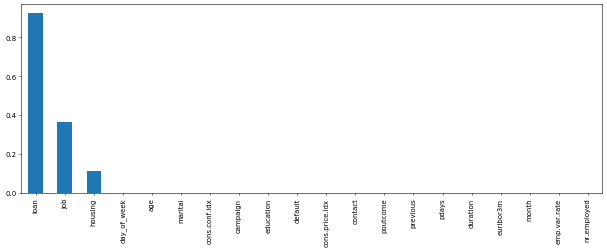

In [475]:
plt.figure(figsize=(15,5),dpi=50)
P_values.plot(kind='bar')
plt.show()

**In this Plot,We had Got the feature with the Help ANNOVA Tes having.In that whichever the features having the highest P_values which less important For Us.**

In [476]:
from sklearn.feature_selection import mutual_info_classif

In [477]:
mi = mutual_info_classif(x_train_scalled,y_train)

In [478]:
mi = pd.Series(mi,index=x_train.columns)

In [479]:
mi.sort_values(ascending=False,inplace=True)

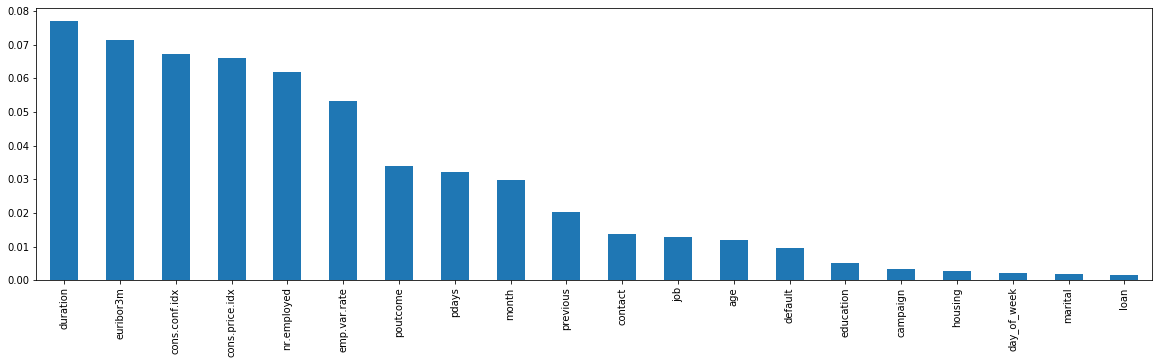

In [480]:
plt.figure(figsize=(20,5))
mi.plot(kind='bar')
plt.show()

**Here,We can see the those are the features having good correlation with target variable are avalible with high mutual information(mi)**

#### Let's Begine with The ANNOVA Test.

In [481]:
sel = SelectKBest(f_classif,k=15)

In [482]:
sel.fit(x_train_scalled,y_train)

SelectKBest(k=15, score_func=<function f_classif at 0x0E1560C0>)

In [483]:
features = x_train.columns[sel.get_support()]
features

Index(['marital', 'education', 'default', 'contact', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [484]:
X_train = sel.transform(x_train_scalled)
X_test  = sel.transform(x_test_scalled)

In [485]:
X_train.shape,X_test.shape

((32950, 15), (8238, 15))

In [486]:
type(X_train)

numpy.ndarray

In [487]:
X_train = pd.DataFrame(X_train,columns=features)
X_test  = pd.DataFrame(X_test,columns=features)

In [488]:
type(X_train)

pandas.core.frame.DataFrame

In [489]:
corrmat = X_train.corr()
corrmat

,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,1.000000,0.034629,-0.031299,0.029381,0.024963,0.009527,-0.005613,-0.030138,0.022368,0.024900,-0.055107,-0.040158,-0.008120,-0.060291,-0.057802
education,0.034629,1.000000,-0.145039,0.099257,0.104747,-0.013050,0.001744,-0.056996,0.044933,0.045528,-0.049739,-0.077613,0.104469,-0.042443,-0.055065
default,-0.031299,-0.145039,1.000000,-0.136745,-0.121858,-0.010710,0.037369,0.081500,-0.106344,-0.112380,0.207490,0.172562,0.026171,0.198995,0.193803
contact,0.029381,0.099257,-0.136745,1.000000,0.188762,0.026148,-0.074217,-0.116561,0.212673,0.226654,-0.391716,-0.589880,-0.250739,-0.397642,-0.267130
month,0.024963,0.104747,-0.121858,0.188762,1.000000,0.028666,-0.062591,-0.231263,0.229868,0.243275,-0.376886,-0.203266,0.090767,-0.382758,-0.460914
duration,0.009527,-0.013050,-0.010710,0.026148,0.028666,1.000000,-0.075663,-0.047127,0.022538,0.026294,-0.027713,0.003441,-0.006424,-0.031492,-0.042358
campaign,-0.005613,0.001744,0.037369,-0.074217,-0.062591,-0.075663,1.000000,0.053795,-0.079051,-0.086686,0.148954,0.126283,-0.013968,0.133033,0.141595
pdays,-0.030138,-0.056996,0.081500,-0.116561,-0.231263,-0.047127,0.053795,1.000000,-0.589601,-0.744301,0.272858,0.077395,-0.095759,0.298964,0.376408
previous,0.022368,0.044933,-0.106344,0.212673,0.229868,0.022538,-0.079051,-0.589601,1.000000,0.866569,-0.420582,-0.200360,-0.048462,-0.455633,-0.503447
poutcome,0.024900,0.045528,-0.112380,0.226654,0.243275,0.026294,-0.086686,-0.744301,0.866569,1.000000,-0.459378,-0.259156,-0.038436,-0.481204,-0.512897


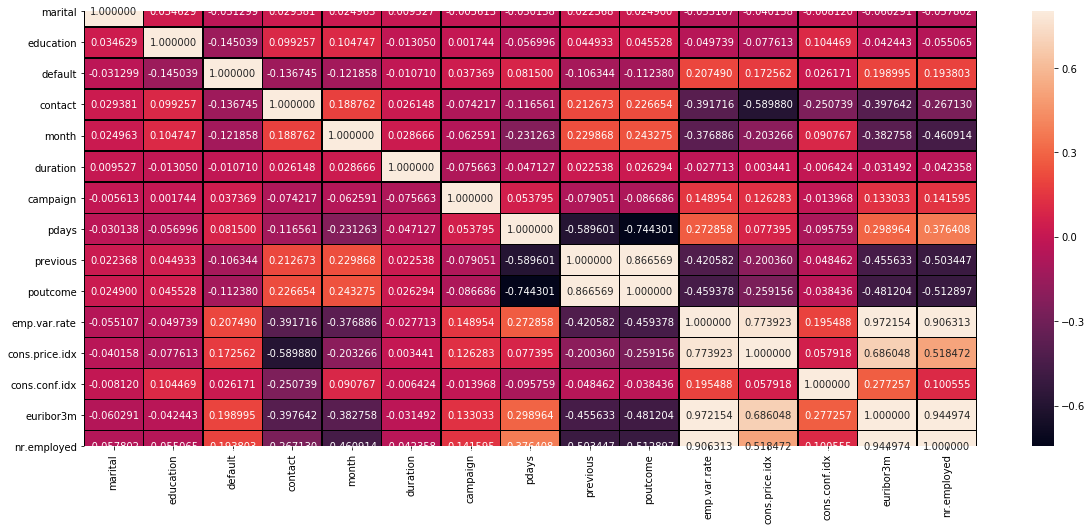

In [490]:
plt.figure(figsize=(20,8))
sns.heatmap(corrmat,annot=True,vmax=0.8,fmt='f',linecolor='black',linewidths=0.4)
plt.show()

Here we can we have some ture which highly correlated to each other.This features are just creating the complexity of our model.

In [491]:
def corrmatdata(data,thresh):
    
    cormat = data.corr()
    corr_col = set()
    
    for i in range(len(cormat.columns)):
        for j in range(i):
            
            if abs(cormat.iloc[i,j])>thresh:
                corrcol = cormat.columns[i]
                corr_col.add(corrcol)
    return corr_col            

In [492]:
feature=corrmatdata(X_train,0.80)
feature

{'euribor3m', 'nr.employed', 'poutcome'}

In [493]:
X_train_uncorr = X_train.drop(columns=feature)
X_test_uncorr  = X_test.drop(columns=feature)

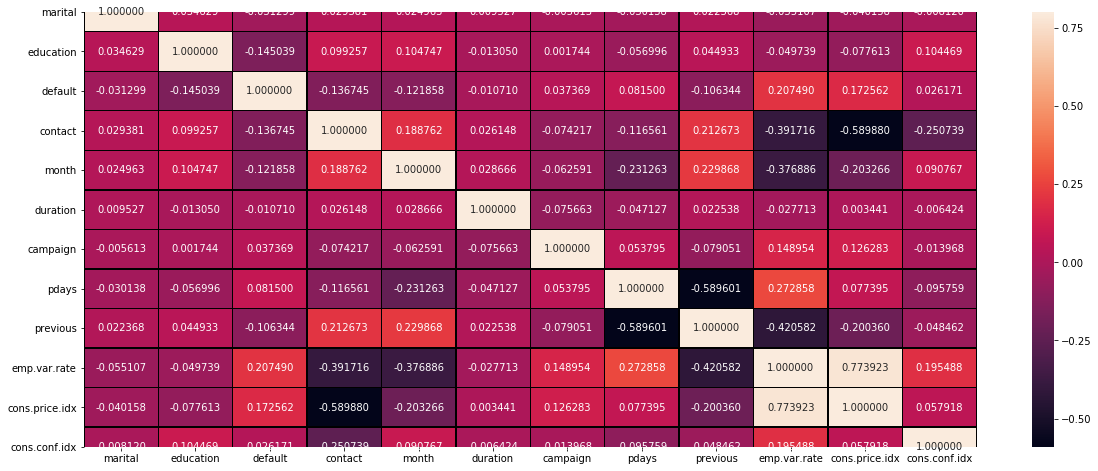

In [494]:
plt.figure(figsize=(20,8))
sns.heatmap(X_train_uncorr.corr(),annot=True,vmax=0.8,fmt='f',linecolor='black',linewidths=0.4)
plt.show()

- In that we are getting some feature which are highly correlated each other and They are making the complexity.
- Like emp.var.rate id highly correlated with cons.price.idx (0.77)
- Similarly,cons.price.idx is correlated with emp_var_rate(0.77) and contact(-0.58)

#### Make the Data Imbalance to Balance.

In [495]:
print('y_train with 0 :-',len(y_train[y_train==0]))
print('y_train with 1 :-',len(y_train[y_train==1]))

y_train with 0 :- 29238
y_train with 1 :- 3712


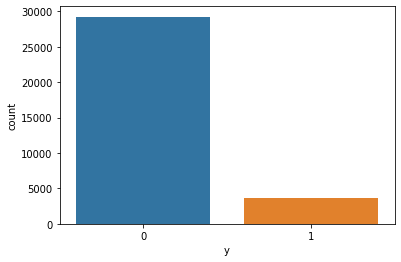

In [496]:
sns.countplot(y_train)
plt.show()

In [497]:
from imblearn.over_sampling import SMOTE

In [498]:
sm = SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)

In [499]:
x_train_res,y_train_res=sm.fit_sample(X_train_uncorr,y_train)

In [500]:
print('y_train_res with 0 :-',len(y_train_res[y_train_res==0]))
print('y_train_res with 1 :-',len(y_train_res[y_train_res==1]))

y_train_res with 0 :- 29238
y_train_res with 1 :- 29238


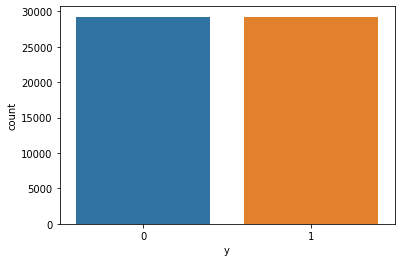

In [501]:
sns.countplot(y_train_res)
plt.show()

## Let's Build The model To Check whether Features can give us better prediction or Not.

In [502]:
model = SVC(C=1,kernel='sigmoid',max_iter=300,random_state=42)
model.fit(x_train_res,y_train_res)
Y_predict=model.predict(X_test_uncorr)
print('Accuaracy Of the model',accuracy_score(y_test,Y_predict))

Accuaracy Of the model 0.8239864044671037


### Check the Cross-Validation Score and also check the Model is overfitted or not.

In [503]:
print('Model Accuarcy with the training data :',model.score(x_train_res,y_train_res))
print('Model Accuarcy with the testing data :',model.score(X_test_uncorr,y_test))

Model Accuarcy with the training data : 0.6017853478350093
Model Accuarcy with the testing data : 0.8239864044671037


### This Model is not working properly on the data which we had provide need some Modification to get better accuarcy.

#### Cross_validation_score calculate to check .

In [504]:
cv_score = round(cross_val_score(model,x_train_res,y_train_res).mean()*100,1)
cv_score

59.7

## Apply the RandomForest(Bagging ensemble learning)

In [505]:
clf = RandomForestClassifier()
clf.fit(x_train_res,y_train_res)
y_pred = clf.predict(X_test_uncorr)
print('Accuarcy :',accuracy_score(y_test,y_pred))

Accuarcy : 0.8959698956057296


In [506]:
print('Model Accuarcy with the training data :',clf.score(x_train_res,y_train_res))
print('Model Accuarcy with the testing data :',clf.score(X_test_uncorr,y_test))

Model Accuarcy with the training data : 0.9994185648813189
Model Accuarcy with the testing data : 0.8959698956057296


In [507]:
cv_score = round(cross_val_score(clf,x_train_res,y_train_res,cv=10).mean()*100,1)
cv_score

93.5

**Above model is overfitted due to features are high so we need to modify the in the features to get more or better accuarcy.**

## AUC-ROC Curve

In [508]:
probab = clf.predict_proba(X_test_uncorr)[:,1]

In [509]:
fpr,tpr,theshold=roc_curve(y_test,probab)

In [510]:
roc_data = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [511]:
auc = round(auc(fpr,tpr),1)

In [512]:
from plotnine import aes,ggplot,ggtitle,geom_abline,geom_area,geom_line

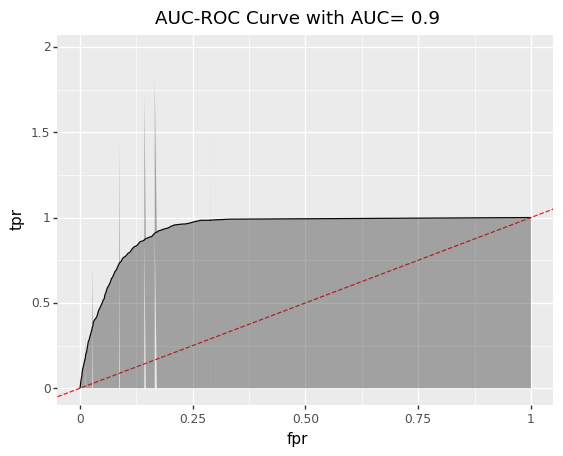

<ggplot: (32320581)>

In [513]:
ggplot(roc_data,aes(x='fpr',y='tpr'))+geom_line()+geom_abline(linetype='dashed',alpha=0.9,color='red')+geom_area(alpha=0.4)+ggtitle('AUC-ROC Curve with AUC= {}'.format(auc))

### Adaboost_Algorithm

In [514]:
clf_add = AdaBoostClassifier()
clf_add.fit(x_train_res,y_train_res)
y_predic=clf_add.predict(X_test_uncorr)
print('accuracy of the model :-',accuracy_score(y_test,y_predic))

accuracy of the model :- 0.8851663025006069


In [515]:
print('Model Accuarcy with the training data :',clf_add.score(x_train_res,y_train_res))
print('Model Accuarcy with the testing data :',clf_add.score(X_test_uncorr,y_test))

Model Accuarcy with the training data : 0.8952390724399754
Model Accuarcy with the testing data : 0.8851663025006069


**This model is Neither Overfitted nor Underfiited**

#### Cross_validation Score

In [516]:
val_score = cross_val_score(clf_add,x_train_res,y_train_res,cv=10).mean()*100
val_score

89.26573649493923

In [522]:
mat = confusion_matrix(y_test,y_predic)
mat

array([[6531,  779],
       [ 167,  761]], dtype=int64)

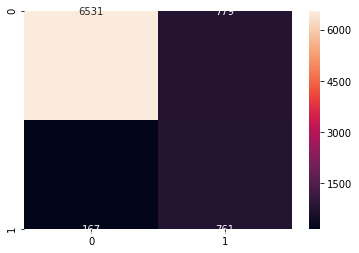

In [523]:
sns.heatmap(mat,annot=True,fmt='d')
plt.show()

In [524]:
print(classification_report(y_test,y_predic))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7310
           1       0.49      0.82      0.62       928

    accuracy                           0.89      8238
   macro avg       0.73      0.86      0.77      8238
weighted avg       0.92      0.89      0.90      8238



In [527]:
dataframe = pd.DataFrame(dict(y_actual=y_test,y_predicted=y_predic))
dataframe.head()

,y_actual,y_predicted
14455,0,0
36380,0,0
40076,0,0
10778,0,0
27939,0,1


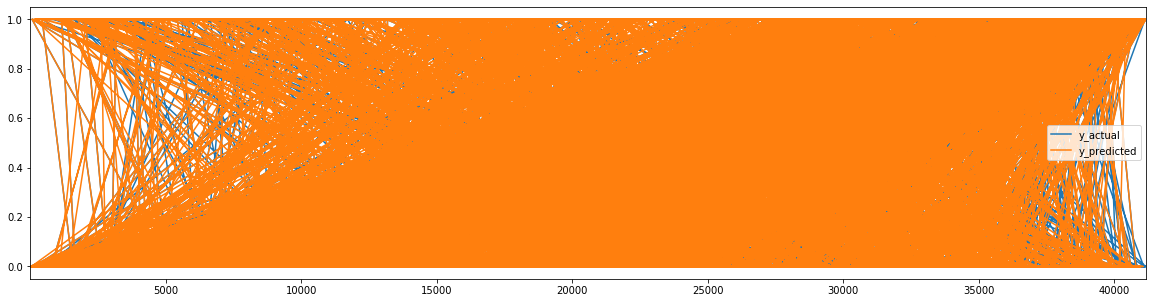

In [529]:
fig,ax = plt.subplots(figsize=(20,5))
dataframe.plot(ax=ax)
plt.show()

### Thank You...!!!